#  **Hands-on-session1 (Querying data from materials databases)**

# **Necessary Libraries**

In [35]:
!pip install matminer[citrine]
!pip install pyyaml
!pip install mp_api
!pip install pandas==2.2.2
!git clone https://github.com/RealBack1/practice.git

fatal: destination path 'practice' already exists and is not an empty directory.


# **Materials Project**

**Getting Data**

*Revised from Joseph Montoya's notebook*

This notebook demonstrates a few basic examples from matminer's data retrieval features. Matminer supports data retrieval from the following sources.

*   Materials Project (https://materialsproject.org/)

This notebook was last updated 11/15/18 for version 0.4.5 of matminer.

Each resource has a corresponding object in matminer designed for retrieving data and preprocessing it into a pandas dataframe. In addition, matminer can also access and aggregate data from your own mongo database, if you have one.


**Data retrieval**

The materials project data retrieval tool, matminer.data_retrieval.retrieve_MP.MPDataRetrieval is initialized using an api_key that can be found on your personal dashboard page on materialsproject.org if you've created an account. If you've set your api key via pymatgen (e.g. pmg config --add PMG_MAPI_KEY YOUR_API_KEY_HERE), the data retrieval tool may be initialized without an input argument.

**We need our own MP API Key**

In [36]:
## Materials Project API client: https://docs.materialsproject.org/downloading-data/using-the-api/getting-started
## Loading module of MP API client
from mp_api.client import MPRester
import pandas as pd

In [37]:
?MPRester

In [38]:
## Put your own API key
my_api_key = "CiInKG9AGVmp2w8U1vDl9U2KI4hK9dDF"
mpr = MPRester(my_api_key)

In [39]:
## See the summary of available fields for crystalline materials
## How about molecular materials?
list_of_available_fields = mpr.materials.summary.available_fields
print(list_of_available_fields)

['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modulus', 'universal_anisotropy', 'homogeneous_poisson', 'e_total', 'e_ionic', 'e_electronic',

In [40]:
## Querying Data from MP (https://docs.materialsproject.org/downloading-data/using-the-api/querying-data)
## Load data for target properties
docs = mpr.materials.summary.search(formula="LiCoO2", fields=list_of_available_fields)
docs

Retrieving SummaryDoc documents:   0%|          | 0/9 [00:00<?, ?it/s]

[MPDataDoc<SummaryDoc>(
 builder_meta=EmmetMeta(emmet_version='0.84.3rc4', pymatgen_version='2024.11.13', run_id='4e80c83d-fc3d-4e2d-8bf5-affe2b0daa98', batch_id=None, database_version='2025.06.09', build_date=datetime.datetime(2024, 11, 21, 21, 20, 47, 201000, tzinfo=datetime.timezone.utc), license='BY-C'),
 nsites=16,
 elements=[Element Co, Element Li, Element O],
 nelements=3,
 composition=Composition('Li4 Co4 O8'),
 composition_reduced=Composition('Li1 Co1 O2'),
 formula_pretty='LiCoO2',
 formula_anonymous='ABC2',
 chemsys='Co-Li-O',
 volume=138.97763486934423,
 density=4.6776427564172245,
 density_atomic=8.686102179334014,
 symmetry=SymmetryData(crystal_system=<CrystalSystem.mono: 'Monoclinic'>, symbol='C2/m', number=12, point_group='2/m', symprec=0.1, angle_tolerance=5.0, version='2.5.0'),
 property_name='summary',
 material_id=MPID(mp-1097885),
 deprecated=False,
 deprecation_reasons=None,
 last_updated=datetime.datetime(2025, 6, 3, 23, 11, 16, 748000, tzinfo=datetime.timezone.u

In [41]:
## Transforming the data list into dictionary type and then dataframe
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
df_full.head(10)

,builder_meta,nsites,elements,nelements,composition,composition_reduced,formula_pretty,formula_anonymous,chemsys,volume,...,weighted_surface_energy,weighted_work_function,surface_anisotropy,shape_factor,has_reconstructed,possible_species,has_props,theoretical,database_Ids,fields_not_requested
0,"{'emmet_version': '0.84.3rc4', 'pymatgen_versi...",16,"[Co, Li, O]",3,"{'Li': 4.0, 'Co': 4.0, 'O': 8.0}","{'Li': 1.0, 'Co': 1.0, 'O': 2.0}",LiCoO2,ABC2,Co-Li-O,138.977635,...,None,None,None,None,None,"[O2-, Co3+, Li+]","{'materials': True, 'thermo': True, 'xas': Tru...",True,None,[database_Ids]
1,"{'emmet_version': '0.84.3rc4', 'pymatgen_versi...",4,"[Co, Li, O]",3,"{'Li': 1.0, 'Co': 1.0, 'O': 2.0}","{'Li': 1.0, 'Co': 1.0, 'O': 2.0}",LiCoO2,ABC2,Co-Li-O,34.567267,...,None,None,None,None,None,"[O2-, Co3+, Li+]","{'materials': True, 'thermo': True, 'xas': Fal...",True,None,[database_Ids]
2,"{'emmet_version': '0.84.3rc4', 'pymatgen_versi...",16,"[Co, Li, O]",3,"{'Li': 4.0, 'Co': 4.0, 'O': 8.0}","{'Li': 1.0, 'Co': 1.0, 'O': 2.0}",LiCoO2,ABC2,Co-Li-O,138.986978,...,None,None,None,None,None,"[O2-, Co3+, Li+]","{'materials': True, 'thermo': True, 'xas': Fal...",True,None,[database_Ids]
3,"{'emmet_version': '0.84.3rc4', 'pymatgen_versi...",4,"[Co, Li, O]",3,"{'Li': 1.0, 'Co': 1.0, 'O': 2.0}","{'Li': 1.0, 'Co': 1.0, 'O': 2.0}",LiCoO2,ABC2,Co-Li-O,31.733697,...,None,None,None,None,None,"[O2-, Co3+, Li+]","{'materials': True, 'thermo': True, 'xas': Tru...",False,None,[database_Ids]
4,"{'emmet_version': '0.84.3rc4', 'pymatgen_versi...",8,"[Co, Li, O]",3,"{'Li': 2.0, 'Co': 2.0, 'O': 4.0}","{'Li': 1.0, 'Co': 1.0, 'O': 2.0}",LiCoO2,ABC2,Co-Li-O,73.734446,...,None,None,None,None,None,"[O2-, Co3+, Li+]","{'materials': True, 'thermo': True, 'xas': Tru...",True,None,[database_Ids]
5,"{'emmet_version': '0.84.3rc4', 'pymatgen_versi...",20,"[Co, Li, O]",3,"{'Li': 5.0, 'Co': 5.0, 'O': 10.0}","{'Li': 1.0, 'Co': 1.0, 'O': 2.0}",LiCoO2,ABC2,Co-Li-O,167.511773,...,None,None,None,None,None,"[O2-, Co3+, Li+]","{'materials': True, 'thermo': True, 'xas': Fal...",True,None,[database_Ids]
6,"{'emmet_version': '0.84.3rc4', 'pymatgen_versi...",20,"[Co, Li, O]",3,"{'Li': 5.0, 'Co': 5.0, 'O': 10.0}","{'Li': 1.0, 'Co': 1.0, 'O': 2.0}",LiCoO2,ABC2,Co-Li-O,167.511744,...,None,None,None,None,None,"[O2-, Co3+, Li+]","{'materials': True, 'thermo': True, 'xas': Tru...",True,None,[database_Ids]
7,"{'emmet_version': '0.84.3rc4', 'pymatgen_versi...",16,"[Co, Li, O]",3,"{'Li': 4.0, 'Co': 4.0, 'O': 8.0}","{'Li': 1.0, 'Co': 1.0, 'O': 2.0}",LiCoO2,ABC2,Co-Li-O,126.287508,...,None,None,None,None,None,"[O2-, Co3+, Li+]","{'materials': True, 'thermo': True, 'xas': Tru...",True,None,[database_Ids]
8,"{'emmet_version': '0.84.3rc4', 'pymatgen_versi...",16,"[Co, Li, O]",3,"{'Li': 4.0, 'Co': 4.0, 'O': 8.0}","{'Li': 1.0, 'Co': 1.0, 'O': 2.0}",LiCoO2,ABC2,Co-Li-O,138.593567,...,None,None,None,None,None,"[O2-, Co3+, Li+]","{'materials': True, 'thermo': True, 'xas': Tru...",True,None,[database_Ids]


In [42]:
## In case you cannot load the data from MP, loading the data from excel file
df_full = pd.read_excel("/content/practice/Class/data/Hands_on_session1_data.xlsx", sheet_name="example_0")

In [43]:
## Selecting the properties you want to use
df = df_full.loc[:, ["formula_pretty", "material_id", "formation_energy_per_atom", "energy_above_hull", "band_gap"]]
df.head(10)

,formula_pretty,material_id,formation_energy_per_atom,energy_above_hull,band_gap
0,TePb,mp-19717,-0.503830,0,0.8063
1,EuTe2Pb,mp-1225161,-1.255306,0,0.0000
2,TePbF6,mp-29178,-2.378361,0,4.6038
3,Tl4Te3Pb,mp-20740,-0.484086,0,0.1037
4,TePbO3,mp-543039,-1.550891,0,3.2104
5,Ga6Te10Pb,mp-686076,-0.590956,0,1.0190
6,TePtPb,mp-1217437,-0.430079,0,0.0000
7,In6Te10Pb,mp-1224649,-0.466164,0,0.9293
8,UTe2PbO8,mp-555259,-2.256445,0,1.9725
9,CuTe2PbO7,mp-1203135,-1.414946,0,0.1653


In [44]:
## https://docs.materialsproject.org/downloading-data/using-the-api/tips-for-large-downloads
## Before requesting data, use the has_props key to find which materials have data for your desired property.
## One source of wasted queries occurs when data is requested for materials that are either nonexistent or do not contain the property of interest.
## You should instead first determine what materials have the data you are looking for.
## For example, below is a query to get all of the material ID values for entries that have dielectric and density of states data:

docs = mpr.materials.summary.search(has_props=["dielectric", "dos"], fields=["material_id"])
docs[0]

Retrieving SummaryDoc documents:   0%|          | 0/5720 [00:00<?, ?it/s]

MPDataDoc<SummaryDoc>(
material_id=MPID(mp-570778),
fields_not_requested=['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modulus', 'universal_anisotropy', 'h

In [45]:
## Load data for target properties
mat = mpr.materials.summary.search(material_ids="mp-28967")
mat

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

[MPDataDoc<SummaryDoc>(
 builder_meta=EmmetMeta(emmet_version='0.84.3rc4', pymatgen_version='2024.11.13', run_id='4e80c83d-fc3d-4e2d-8bf5-affe2b0daa98', batch_id=None, database_version='2025.06.09', build_date=datetime.datetime(2024, 11, 21, 20, 8, 5, 892000, tzinfo=datetime.timezone.utc), license='BY-C'),
 nsites=14,
 elements=[Element Ba, Element Pd, Element S],
 nelements=3,
 composition=Composition('Ba2 Pd4 S8'),
 composition_reduced=Composition('Ba1 Pd2 S4'),
 formula_pretty='Ba(PdS2)2',
 formula_anonymous='AB2C4',
 chemsys='Ba-Pd-S',
 volume=316.34140399923814,
 density=5.022717317257348,
 density_atomic=22.595814571374152,
 symmetry=SymmetryData(crystal_system=<CrystalSystem.mono: 'Monoclinic'>, symbol='P2_1/m', number=11, point_group='2/m', symprec=0.1, angle_tolerance=5.0, version='2.5.0'),
 property_name='summary',
 material_id=MPID(mp-28967),
 deprecated=False,
 deprecation_reasons=None,
 last_updated=datetime.datetime(2025, 6, 3, 23, 9, 23, 940000, tzinfo=datetime.timezone.

In [46]:
## Sort the values in ascending order for a specific property (ex. formation_energy_per_atom)
sdf = df.sort_values(by="formation_energy_per_atom")
sdf.head(10)

,formula_pretty,material_id,formation_energy_per_atom,energy_above_hull,band_gap
31,Hf3TePb4O13,mp-1224517,-2.622523,0,1.7083
29,Zr3TePb4O13,mp-1215669,-2.520655,0,1.8126
2,TePbF6,mp-29178,-2.378361,0,4.6038
16,UTe(PbO4)2,mp-1191464,-2.284697,0,1.7450
8,UTe2PbO8,mp-555259,-2.256445,0,1.9725
25,Mn3TeP2Pb3O14,mp-1192249,-2.156792,0,2.4566
27,Zn3TeP2Pb3O14,mp-1199741,-2.087705,0,3.1622
36,U3Te5(PbO4)8,mp-1217243,-2.087479,0,1.8788
17,Zn3Te2P2(PbO7)2,mp-1195381,-2.047561,0,2.9945
12,Zn4SiTePbO10,mp-558938,-1.991868,0,2.4624


In [47]:
## Load the same materials' data with different way
docs = mpr.materials.summary.search(chemsys="Li-Co-O", formula="ABC2", fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
#df_full = pd.read_excel("/content/practice/Class/data/Hands_on_session1_data.xlsx", sheet_name="example_0")
df = df_full.loc[:, ["formula_pretty", "material_id", "formation_energy_per_atom", "energy_above_hull", "band_gap"]]
sdf = df.sort_values(by="formation_energy_per_atom", axis=0)
sdf.head(10)

Retrieving SummaryDoc documents:   0%|          | 0/9 [00:00<?, ?it/s]

,formula_pretty,material_id,formation_energy_per_atom,energy_above_hull,band_gap
4,LiCoO2,mp-22526,-1.745660,0.000000,0.6623
6,LiCoO2,mp-849273,-1.745064,0.000596,0.0000
7,LiCoO2,mp-853240,-1.708760,0.036900,1.8839
0,LiCoO2,mp-1097885,-1.702223,0.043437,2.0128
3,LiCoO2,mp-1404711,-1.700069,0.045590,1.9960
8,LiCoO2,mp-867664,-1.660155,0.085504,0.0000
5,LiCoO2,mp-753473,-1.652405,0.093254,0.9076
1,LiCoO2,mp-1222334,-1.534238,0.211422,0.0000
2,LiCoO2,mp-1340071,-0.231824,1.513835,0.0000


Getting a dataframe corresponding to the materials project is essentially equivalent to using the MPRester's query method.(see https://api.materialsproject.org/docs) The inputs are criteria and fields, a list of supported properties which to return. See the MAPI documentation (https://docs.materialsproject.org/downloading-data)

**Example 1: Get various properties of binary oxide materials with "A2O3" formula**


In [48]:
docs = mpr.materials.summary.search(chemsys="*-O", formula="A2B3", fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/practice/Class/data/Hands_on_session1_data.xlsx", sheet_name="example_1")
df = df_full.loc[:, ["formula_pretty", "material_id", "formation_energy_per_atom", "energy_above_hull", "band_gap"]]
sdf = df.sort_values(by="formation_energy_per_atom", axis=0)
sdf.head(10)

Retrieving SummaryDoc documents:   0%|          | 0/376 [00:00<?, ?it/s]

,formula_pretty,material_id,formation_energy_per_atom,energy_above_hull,band_gap
257,Lu2O3,mp-1427,-4.123784,0.000000,4.0211
265,Tm2O3,mp-1767,-4.090073,0.000000,3.6932
138,Lu2O3,mp-556477,-4.076956,0.046827,4.2763
278,Er2O3,mp-679,-4.057094,0.000000,3.9629
269,Yb2O3,mp-2814,-4.052655,0.000000,0.0000
141,Tm2O3,mp-556253,-4.051474,0.038599,4.1691
211,Lu2O3,mp-13068,-4.039625,0.084159,4.0883
280,Ho2O3,mp-812,-4.027559,0.000000,3.9458
135,Er2O3,mp-2460,-4.022895,0.034199,4.1023
213,Tm2O3,mp-13067,-4.021752,0.068321,4.1535


#### Example 2: Get materials only containing "Fe", and "O"

In [49]:
docs = mpr.materials.summary.search(chemsys="*-*", elements=["Fe", "O"], fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/practice/Class/data/Hands_on_session1_data.xlsx", sheet_name="example_2")
df = df_full.loc[:, ["formula_pretty", "material_id", "energy_above_hull"]]
df.head()

Retrieving SummaryDoc documents:   0%|          | 0/140 [00:00<?, ?it/s]

,formula_pretty,material_id,energy_above_hull
0,FeO,mp-1244983,0.277821
1,FeO,mp-1245001,0.320338
2,FeO,mp-1245168,0.305695
3,FeO2,mp-1354450,0.271338
4,FeO2,mp-1181766,0.180203


#### Example 3: Get all bandgaps larger than 6.0 eV

In [50]:
docs = mpr.materials.summary.search(band_gap=(6,None), fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/practice/Class/data/Hands_on_session1_data.xlsx", sheet_name="example_3")
df = df_full.loc[:, ["formula_pretty", "material_id", "band_gap"]]
df.head()

Retrieving SummaryDoc documents:   0%|          | 0/933 [00:00<?, ?it/s]

,formula_pretty,material_id,band_gap
0,AcF3,mp-977360,7.4101
1,AcF3,mp-985278,6.0693
2,Al(BH4)3,mp-569787,6.3335
3,Al2(SO4)3,mp-4417,6.0272
4,Al2P3(HO3)3,mp-23995,6.2699


Get binary compounds' bandgaps larger than 6.0 eV

In [51]:
docs = mpr.materials.summary.search(chemsys="*-*", band_gap=(6, None), fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/practice/Class/data/Hands_on_session1_data.xlsx", sheet_name="example_3_2")
df = df_full.loc[:, ["formula_pretty", "material_id", "band_gap"]]
df.head()

Retrieving SummaryDoc documents:   0%|          | 0/106 [00:00<?, ?it/s]

,formula_pretty,material_id,band_gap
0,AcF3,mp-977360,7.4101
1,AcF3,mp-985278,6.0693
2,AlF3,mp-1103295,7.4257
3,AlF3,mp-1182902,7.4904
4,AlF3,mp-1183007,7.4905


Get tertiary lithium oxide compounds' bandgaps larger thatn 6.0eV

In [52]:
docs = mpr.materials.summary.search(num_elements=3, elements=["Li", "O"], band_gap=(6,None), fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/practice/Class/data/Hands_on_session1_data.xlsx", sheet_name="example_3_3")
df = df_full.loc[:, ["formula_pretty", "material_id", "band_gap"]]
df.head()

Retrieving SummaryDoc documents:   0%|          | 0/9 [00:00<?, ?it/s]

,formula_pretty,material_id,band_gap
0,LiBO2,mp-14232,7.2811
1,LiAlO2,mp-8001,6.1183
2,LiB3O5,mp-3660,6.4843
3,LiB3O5,mp-1020025,6.1706
4,Li2SO4,mp-4556,6.0132


#### Example 4: Get all bulk modulus from the tertiary lithium oxide which has the "elasticity" property

In [53]:
docs = mpr.materials.summary.search(chemsys="Li-*-O", has_props=["elasticity"], fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/practice/Class/data/Hands_on_session1_data.xlsx", sheet_name="example_4")
df = df_full.loc[:, ["formula_pretty", "material_id", "bulk_modulus"]]
df.head()

Retrieving SummaryDoc documents:   0%|          | 0/87 [00:00<?, ?it/s]

,formula_pretty,material_id,bulk_modulus
0,Li7B18O,mp-2468835,"{'voigt': 129.656, 'reuss': 129.497, 'vrh': 12..."
1,LiTi2O4,mp-675334,"{'voigt': 169.144, 'reuss': 168.069, 'vrh': 16..."
2,Li2B4O7,mp-4779,"{'voigt': 46.717, 'reuss': 37.124, 'vrh': 41.92}"
3,LiAlO2,mp-34993,"{'voigt': 160.607, 'reuss': 145.731, 'vrh': 15..."
4,Li5SbO5,mp-29364,"{'voigt': 95.31, 'reuss': 93.202, 'vrh': 94.256}"


In [54]:
## Looking at the dataframe whether there is missing data
df

,formula_pretty,material_id,bulk_modulus
0,Li7B18O,mp-2468835,"{'voigt': 129.656, 'reuss': 129.497, 'vrh': 12..."
1,LiTi2O4,mp-675334,"{'voigt': 169.144, 'reuss': 168.069, 'vrh': 16..."
2,Li2B4O7,mp-4779,"{'voigt': 46.717, 'reuss': 37.124, 'vrh': 41.92}"
3,LiAlO2,mp-34993,"{'voigt': 160.607, 'reuss': 145.731, 'vrh': 15..."
4,Li5SbO5,mp-29364,"{'voigt': 95.31, 'reuss': 93.202, 'vrh': 94.256}"
...,...,...,...
82,LiAg3O2,mp-27227,"{'voigt': 67.046, 'reuss': 65.992, 'vrh': 66.519}"
83,LiCuO2,mp-773044,"{'voigt': 83.32, 'reuss': 30.776, 'vrh': 57.048}"
84,Li4NbO4,mp-755298,"{'voigt': 73.717, 'reuss': 73.657, 'vrh': 73.687}"
85,Li4UO5,mp-7714,"{'voigt': 87.147, 'reuss': 83.752, 'vrh': 85.449}"


In [55]:
df.describe()

,formula_pretty,material_id,bulk_modulus
count,87,87,87
unique,68,87,87
top,LiCuO2,mp-2468835,"{'voigt': 129.656, 'reuss': 129.497, 'vrh': 12..."
freq,5,1,1


In [56]:
## Drop the rows where at least one element is missing.
df_clean = df.dropna()
df_clean.describe()

,formula_pretty,material_id,bulk_modulus
count,87,87,87
unique,68,87,87
top,LiCuO2,mp-2468835,"{'voigt': 129.656, 'reuss': 129.497, 'vrh': 12..."
freq,5,1,1


In [57]:
## Dividing data of dictionary types in new columns
## Voigt value: Upper bound of bulk modulus, Reuss value: Lower bound of bulk modulus, VRH: Average of two values
df_expanded = pd.json_normalize(df_clean['bulk_modulus'])
df_expanded.head()

,voigt,reuss,vrh
0,129.656,129.497,129.576
1,169.144,168.069,168.606
2,46.717,37.124,41.920
3,160.607,145.731,153.169
4,95.310,93.202,94.256


In [58]:
df_drop = df_clean.drop(columns=['bulk_modulus'])
df_drop.head(10)

,formula_pretty,material_id
0,Li7B18O,mp-2468835
1,LiTi2O4,mp-675334
2,Li2B4O7,mp-4779
3,LiAlO2,mp-34993
4,Li5SbO5,mp-29364
5,Li5TaO5,mp-755013
6,Li2HfO3,mp-756597
7,Li2PdO3,mp-760483
8,Li2Ti3O6,mp-760539
9,Li5NbO5,mp-770649


In [59]:
df_join = df_drop.join(df_expanded)
sdf = df_join.sort_values(by="vrh", axis=0)
sdf.head(10)

,formula_pretty,material_id,voigt,reuss,vrh
12,LiHO,mp-23856,17.653,10.848,14.251
75,LiClO4,mp-30301,30.936,29.109,30.023
15,Li7Br3O2,mp-28592,38.267,37.099,37.683
20,NaLiO,mp-755959,38.430,38.427,38.429
48,LiNO3,mp-8180,41.125,38.415,39.770
2,Li2B4O7,mp-4779,46.717,37.124,41.920
23,Li2SO4,mp-4556,45.140,44.859,45.000
59,Li3BrO,mp-28593,48.727,48.727,48.727
61,NaLiO3,mp-975990,49.933,49.933,49.933
63,Li3ClO,mp-985585,51.628,51.628,51.628


In [60]:
## Simple code for same procedure
df_expanded = pd.json_normalize(df_clean['bulk_modulus'])
sdf = df_clean.drop(columns=['bulk_modulus']).join(df_expanded).sort_values(by="vrh", axis=0)
sdf.head(10)

,formula_pretty,material_id,voigt,reuss,vrh
12,LiHO,mp-23856,17.653,10.848,14.251
75,LiClO4,mp-30301,30.936,29.109,30.023
15,Li7Br3O2,mp-28592,38.267,37.099,37.683
20,NaLiO,mp-755959,38.430,38.427,38.429
48,LiNO3,mp-8180,41.125,38.415,39.770
2,Li2B4O7,mp-4779,46.717,37.124,41.920
23,Li2SO4,mp-4556,45.140,44.859,45.000
59,Li3BrO,mp-28593,48.727,48.727,48.727
61,NaLiO3,mp-975990,49.933,49.933,49.933
63,Li3ClO,mp-985585,51.628,51.628,51.628


Now let us do a more sophisticated query and ask for more properties such as "bandstructure" and "phase diagram".

Let's look at the band structure of some of these stable compounds that contain Pb and Te which are interesting for thermoelectrics applications:

In [61]:
## Querying the band structures of the stable Pb-Te binary compounds
docs = mpr.materials.summary.search(elements=["Pb", "Te"], energy_above_hull = (0,1e-6), fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/practice/Class/data/Hands_on_session1_data.xlsx", sheet_name="example_advanced")
df = df_full.loc[:, ["formula_pretty", "material_id", "energy_above_hull", "bandstructure", "dos"]]
df.head()

Retrieving SummaryDoc documents:   0%|          | 0/37 [00:00<?, ?it/s]

,formula_pretty,material_id,energy_above_hull,bandstructure,dos
0,TePb,mp-19717,0.0,{'setyawan_curtarolo': {'task_id': 'mp-1059878...,"{'total': {'1': {'task_id': 'mp-2293934', 'ban..."
1,EuTe2Pb,mp-1225161,0.0,{'setyawan_curtarolo': {'task_id': 'mp-1626886...,"{'total': {'1': {'task_id': 'mp-1734499', 'ban..."
2,TePbF6,mp-29178,0.0,{'setyawan_curtarolo': {'task_id': 'mp-1622458...,"{'total': {'1': {'task_id': 'mp-1752997', 'ban..."
3,Tl4Te3Pb,mp-20740,0.0,{'setyawan_curtarolo': {'task_id': 'mp-1605559...,"{'total': {'1': {'task_id': 'mp-1705819', 'ban..."
4,TePbO3,mp-543039,0.0,None,None


In [62]:
## Loading modules for plotting band structures
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt

In [63]:
## Querying the band structures of specific material with its MP ID (mp-20740)
band_structure = mpr.get_bandstructure_by_material_id("mp-20740")

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

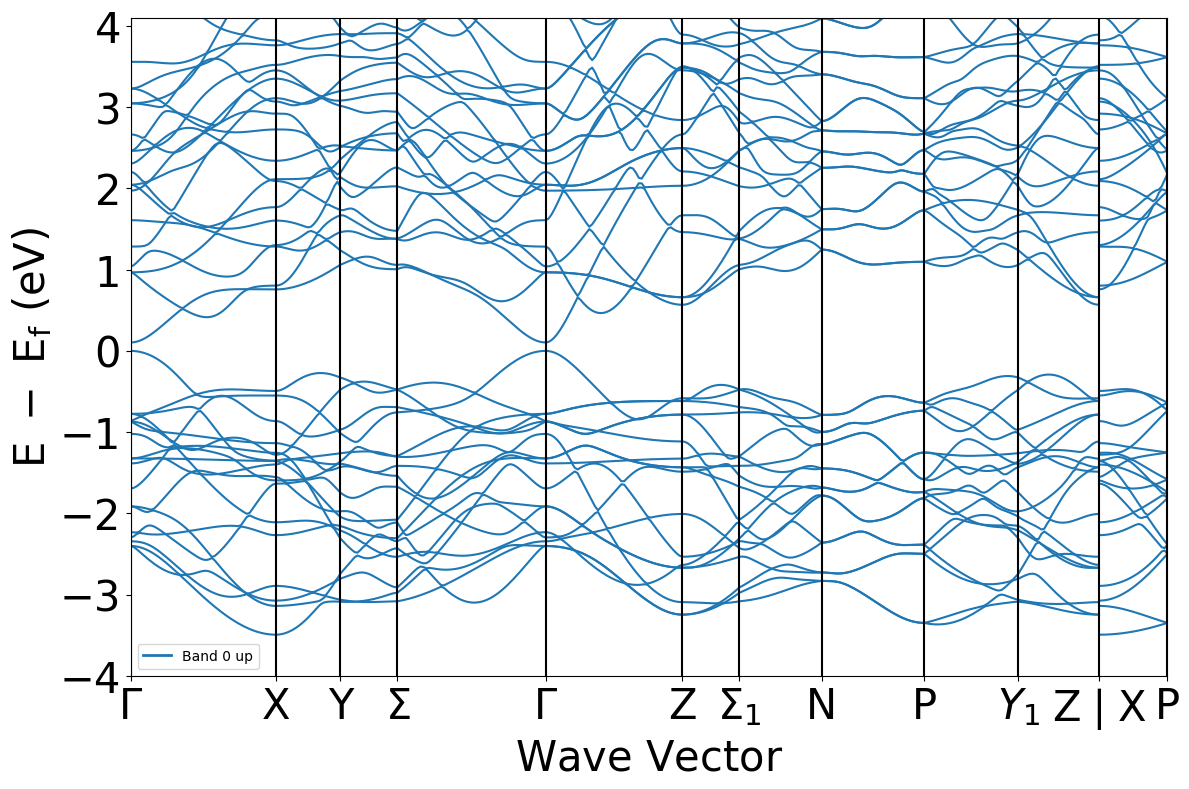

In [64]:
## Using BSPlotter function, plotting its band structure
plotter = BSPlotter(band_structure)
plot = plotter.get_plot()

Let's look at the phase diagram for Ni-Co-Mn

(This code was written with reference to the Jupyter notebook by Materials Virtual Lab(https://matgenb.materialsvirtuallab.org/))

In [65]:
## Loading functions for generating and plotting phase diagram from phase_diagram module of Pymatgen's analysis
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter

In [66]:
# Querying all compounds in Ni-Ci-Mn compositional spaces using "get_entries_in_chemsys" function
entries = mpr.get_entries_in_chemsys(elements=["Ni", "Co", "Mn"], additional_criteria={"thermo_types": ["GGA_GGA+U"]})

Retrieving ThermoDoc documents:   0%|          | 0/38 [00:00<?, ?it/s]

In [67]:
# Construct phase diagram
pd = PhaseDiagram(entries)

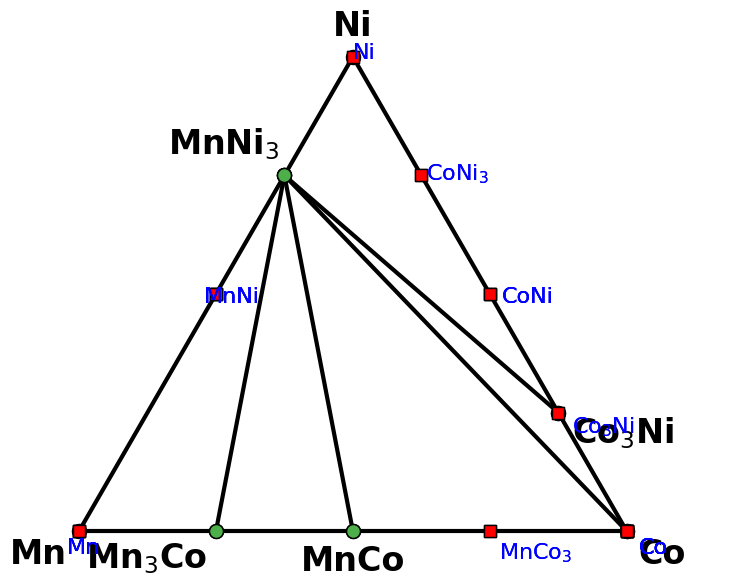

In [68]:
# Plot phase diagram
plotter = PDPlotter(pd, backend="matplotlib")
plotter.show()